# Aggregated project - 1 
Campaign for the online shop.    

It is required to identify the patterns determining the success of the game. Help the shop to bet on a potentially popular product and plan advertising campaigns.

In [1]:
# libraries import
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import matplotlib 

In [97]:
# widening display and returning full TOC
from IPython.display import display, HTML
display(HTML("<style>.container { width:80%; align: left; }</style>"))
display(HTML("<style>#toc-wrapper{ position: relative; width: 20%; top: 130px; left: 0px; }</style>"))

## Loading data. Working with a file

### Let's upload a file, get information about the data:¶

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Notice that there are capital letters in the column names while we perefer snake_case everywhere/

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We get a file with data about games: title, platform, year of release, genre, sales in different regions and game scores.
In some columns there are blanks, further we will look through them and process them (title, year, genre, ratings, etc.).
The data type may be changed in the `year of release` and in the `user score`.

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


We see that the table contains data for the years 1980-2016.
Later we need to look at the information in the `sales` columns, we suspect that there are anomalies.

Let's check for exact duplicates:

In [5]:
games.duplicated().sum()

0

There are no obvious duplicates.

From the documentation we know the designations of the data in the table:

- Name - game name
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - critics' score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating - rating from ESRB (Entertainment Software Rating Board) organisation. This association determines the rating of computer games and assigns them a suitable age category.

### Summary:  
The data has been examined, we see the need to process missing values and anomalies and change the case of the headers.

## Pre-processing

### Let's make headers using snake_case

In [6]:
games.columns = [x.lower() for x in games.columns]
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Let's examine the missing values:

#### `name` column

In [7]:
games['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [8]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Here is clearly a typo, two blanks appeared due to human factor, the games are quite old, when they were entered into our database, they could have just missed. Uninformative lines, we can't replace them, we just delete them:

In [9]:
games = games.dropna(subset=['name']).reset_index(drop=True)
games['name'].isna().value_counts()

name
False    16713
Name: count, dtype: int64

We have deleted the blanks in the name column, we note that the blanks in the genre column were deleted, too.

#### Let's check the column `year_of_release`

In [10]:
games['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [11]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


The missings in the year could also happen by accident: a human didn't enter it accidentally or just didn't want to search data about some old games, or there is a year in the title, so thought that this is the year of release, so what's the difference.

Let's try to extract the year from the name of the game, where possible:

In [12]:
games['year'] = games['name'].str.extract(r'(\d{4})')

In [13]:
games[~games['year'].isnull()]

games['year'] = games['year'].fillna(0)
games['year'] = games['year'].astype(int)


In [14]:
games.loc[games['year'] < 1980, 'year'] = np.nan
games.loc[games['year'] > 2016, 'year'] = np.nan

In [15]:
games.year_of_release.fillna(games.year, inplace=True)
del games['year']

In [16]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Filled in 17 rows.

Let's calculate the share of missing data in the total amount of data:

In [17]:
nan = 252 * 100 / 16713
round(nan, 1)

1.5

This number can be ignored, let's delete the lines with missing year of release:

In [18]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
games['year_of_release'].isna().value_counts()

year_of_release
False    16461
Name: count, dtype: int64

Let's replace the data type with intiger:

In [19]:
games['year_of_release'] = games['year_of_release'].astype(int)

Dropped the missing values, changed data type.

#### Let's check the column `user_score`

In [20]:
games['user_score'].describe()

count     9851
unique      96
top        tbd
freq      2378
Name: user_score, dtype: object

In [21]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

We see that there is a value tbd, which means `to be decided` or `to be determined`, that is, not yet determined. For us, it's just like `nan`.

In [22]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

Now let's change the data type to float:

In [23]:
games['user_score'] = games['user_score'].astype(float)

In [24]:
games['user_score'].describe()

count    7473.000000
mean        7.127793
std         1.499196
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [25]:
games['user_score'].isna().value_counts()

user_score
True     8988
False    7473
Name: count, dtype: int64

There are a lot of blanks, not all games have received any ratings, we can't remove the blanks, we replaced the data type.

#### Let's process the `rating` column

In [26]:
games['rating'].describe()

count     9779
unique       8
top          E
freq      3930
Name: rating, dtype: object

In [27]:
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

The American age classification of video games, where the value K-A (kids to adults) became E (everyone) in 1998. Since we have data on games since 1980, this seems to be true. We can replace K-A with E for future convenience.

In [28]:
games['rating'] = games['rating'].replace('K-A', 'E')

In [29]:
games['rating'].isna().value_counts()

rating
False    9779
True     6682
Name: count, dtype: int64

We have processed the column, there are a lot of missing values,  let's leave them.
There is a possibility that the omissions are games without any age restrictions, however, they can also be games that have not gained popularity, have not reached any official release, where this criteria is necessary.

#### Column `critic_score`

In [30]:
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [31]:
games['critic_score'].isna().value_counts()

critic_score
True     8466
False    7995
Name: count, dtype: int64

The data is correct, there are many blanks, there is nothing we can do with it.

#### Column `user_score`

In [32]:
games['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [33]:
games['user_score'].isna().value_counts()

user_score
True     8988
False    7473
Name: count, dtype: int64

The data is correct, there are a lot of blanks, there is nothing we can do about it.
In general, it's clear, there are millions of games, not every game has got to all ratings. And if users have got there, not everyone always writes ratings and reviews. 

### Let's create a separate column with total sales in all regions:

In [34]:
games['all_regions_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [35]:
games['all_regions_sales'].describe()

count    16461.000000
mean         0.536463
std          1.558744
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: all_regions_sales, dtype: float64

Outliers are suspected, we'll work with them later.

**Let's check for near duplicates:**  
meaningful ones may occur in the name column, duplicates are ok in the other numeric and name columns.

In [36]:
dup_names = games.duplicated(subset=['name'])
games[dup_names.isin(dup_names[dup_names.duplicated()])].sort_values("name").head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
14760,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
1071,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN,1.67
3316,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN,0.59
3816,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN,0.51
13590,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
2426,Tales of Xillia 2,PS3,2012,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T,0.84
4669,'98 Koshien,PS,1998,Sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN,0.40
8220,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN,0.17
6988,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN,0.23
8472,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN,0.16


We see that the duplicates in the titles are due to the fact that the same game can be released for different consoles. So we leave these duplicates.  
But let's look at the dups which have some cells that differ:

In [37]:
games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
603,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15985,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Looks like a semi-obvious duplicate, we can delete the line with index 15985:

In [38]:
games = games.drop(index=15985)

### Summary:
Data prepared, column names adjusted to lower case, data types corrected, blanks handled where possible, total sales of all regions calculated.

## Exploratory data anlysis

### Let's check how many games were released in different years

In [39]:
games.groupby('year_of_release')['name'].count().head(37)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     830
2003     779
2004     764
2005     941
2006    1008
2007    1198
2008    1429
2009    1427
2010    1255
2011    1137
2012     652
2013     545
2014     581
2015     606
2016     502
Name: name, dtype: int64

It's better to visualize this data:

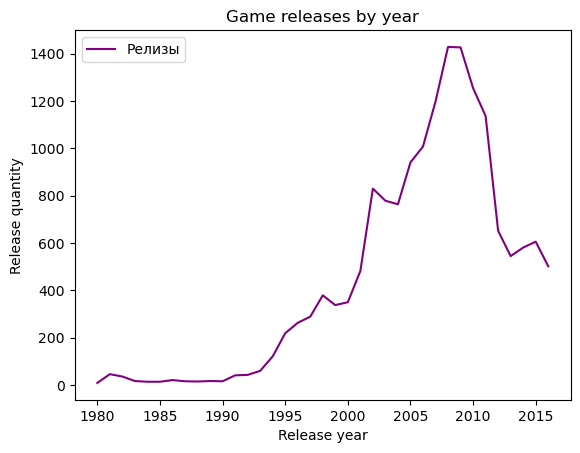

In [40]:
plt.plot(games.groupby('year_of_release')['name'].count(), label='Релизы', color='purple')
plt.legend()
plt.title('Game releases by year')
plt.xlabel('Release year')
plt.ylabel('Release quantity')
plt.show()

The graph shows that according to existing data in 1980-90s the number of games was minimal 9-60 games per year, by 2000s video games start to take over the world. The data shows that in 2008 the number of new games peaks at 1429 releases for the year, and drops off further.
The old data is very interesting, but not so important for making plans for the nearest future. We will study the period 1994-2016, from the beginning of the industry's rise, and for this purpose we will create a table with data only for this period:

In [41]:
games_valuable = games[games['year_of_release'] > 1993]
games_valuable['year_of_release'].sort_values()

5902     1994
11700    1994
520      1994
3726     1994
13819    1994
         ... 
14161    2016
10255    2016
10253    2016
10375    2016
16460    2016
Name: year_of_release, Length: 16095, dtype: int32

### How sales have changed by platform

Let's examine the data by platform:

In [42]:
print(games['platform'].sort_values().unique())
games['platform'].nunique()

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


31

Let's look at the number of games created for specific platforms:

In [43]:
games_by_platform = games.groupby('platform')['name'].count().head(31)
games_by_platform.sort_values(ascending=False)

platform
PS2     2134
DS      2122
PS3     1305
Wii     1286
X360    1234
PSP     1195
PS      1190
PC       958
GBA      811
XB       806
GC       543
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: name, dtype: int64

We have data for 31 platforms with PS2 and DS leading the way.

Let's look at the sales by year:

In [44]:
platform_sales = games_valuable.pivot_table(index='platform', values='all_regions_sales', columns='year_of_release', aggfunc='count', fill_value=0)
pd.set_option('display.max_columns', None)
platform_sales

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,
3DO,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46
DC,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
DS,0,0,0,0,0,0,0,0,0,0,23,118,201,376,493,403,323,153,23,8,0,0,0
GB,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GBA,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0
GC,0,0,0,0,0,0,0,22,152,145,83,97,40,4,0,0,0,0,0,0,0,0,0
GEN,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
N64,0,0,18,49,77,102,60,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


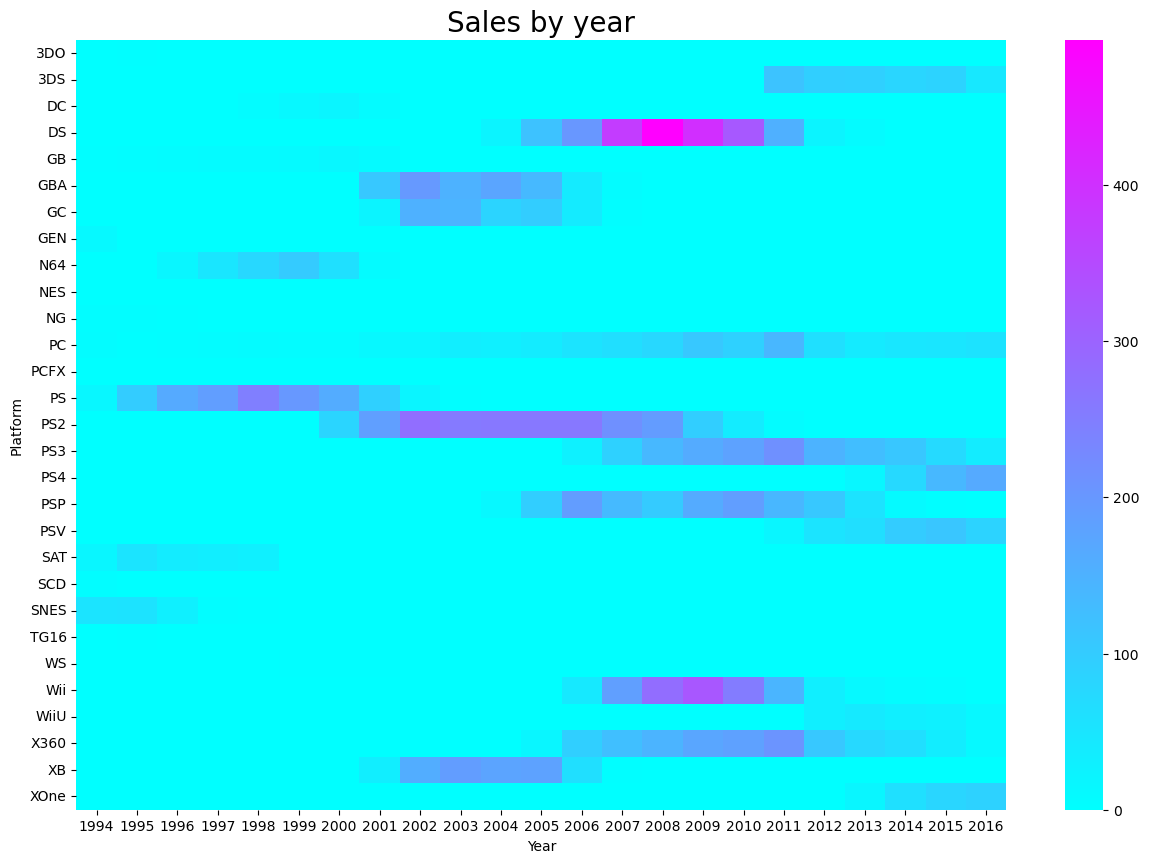

In [45]:
plt.figure(figsize=(15, 10))
sns.heatmap(platform_sales, cmap='cool')

plt.title('Sales by year', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

It's pretty cool to see how PS tried to break through in the late 90s, but only PS2 got to 300 million copies in the early 2000s and maintained it for a long time, and Nintendo DC got to the 400 million copy mark by 2006 and broke it even a little later, still doing well. No one else managed to achieve such figures. These figures can be explained by the fact that the DS is a pocket console, it is convenient, you can use it at home and take it with you anywhere, so the sales growth is logical. Also the Wii, which not for a long time, but also approached the sales figures of 300 million copies, and X360, which in the mid-2000s reached 200 million copies. Let's look at their distribution in detail.
We can also analyse the survivability of platforms: if it fails to reach a sufficient level in 3-4 years, the platform fades away, if it succeeds, it can hold on for 6-10 years. We see the only exception PC, personal computers will live forever, and, apparently, games will be released for them occasionally).

In [46]:
top_platforms = ['PS', 'DS', 'PS2', 'Wii', 'X360']
top_sales_platforms = platform_sales.query('platform in @top_platforms')
top_sales_platforms

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,
DS,0,0,0,0,0,0,0,0,0,0,23,118,201,376,493,403,323,153,23,8,0,0,0
PS,17,99,164,188,248,200,160,91,20,3,0,0,0,0,0,0,0,0,0,0,0,0,0
PS2,0,0,0,0,0,0,82,185,280,258,261,261,261,214,191,96,38,7,0,0,0,0,0
Wii,0,0,0,0,0,0,0,0,0,0,0,0,44,185,282,325,253,143,31,12,6,4,1
X360,0,0,0,0,0,0,0,0,0,0,0,18,93,124,146,172,182,207,106,75,63,35,13


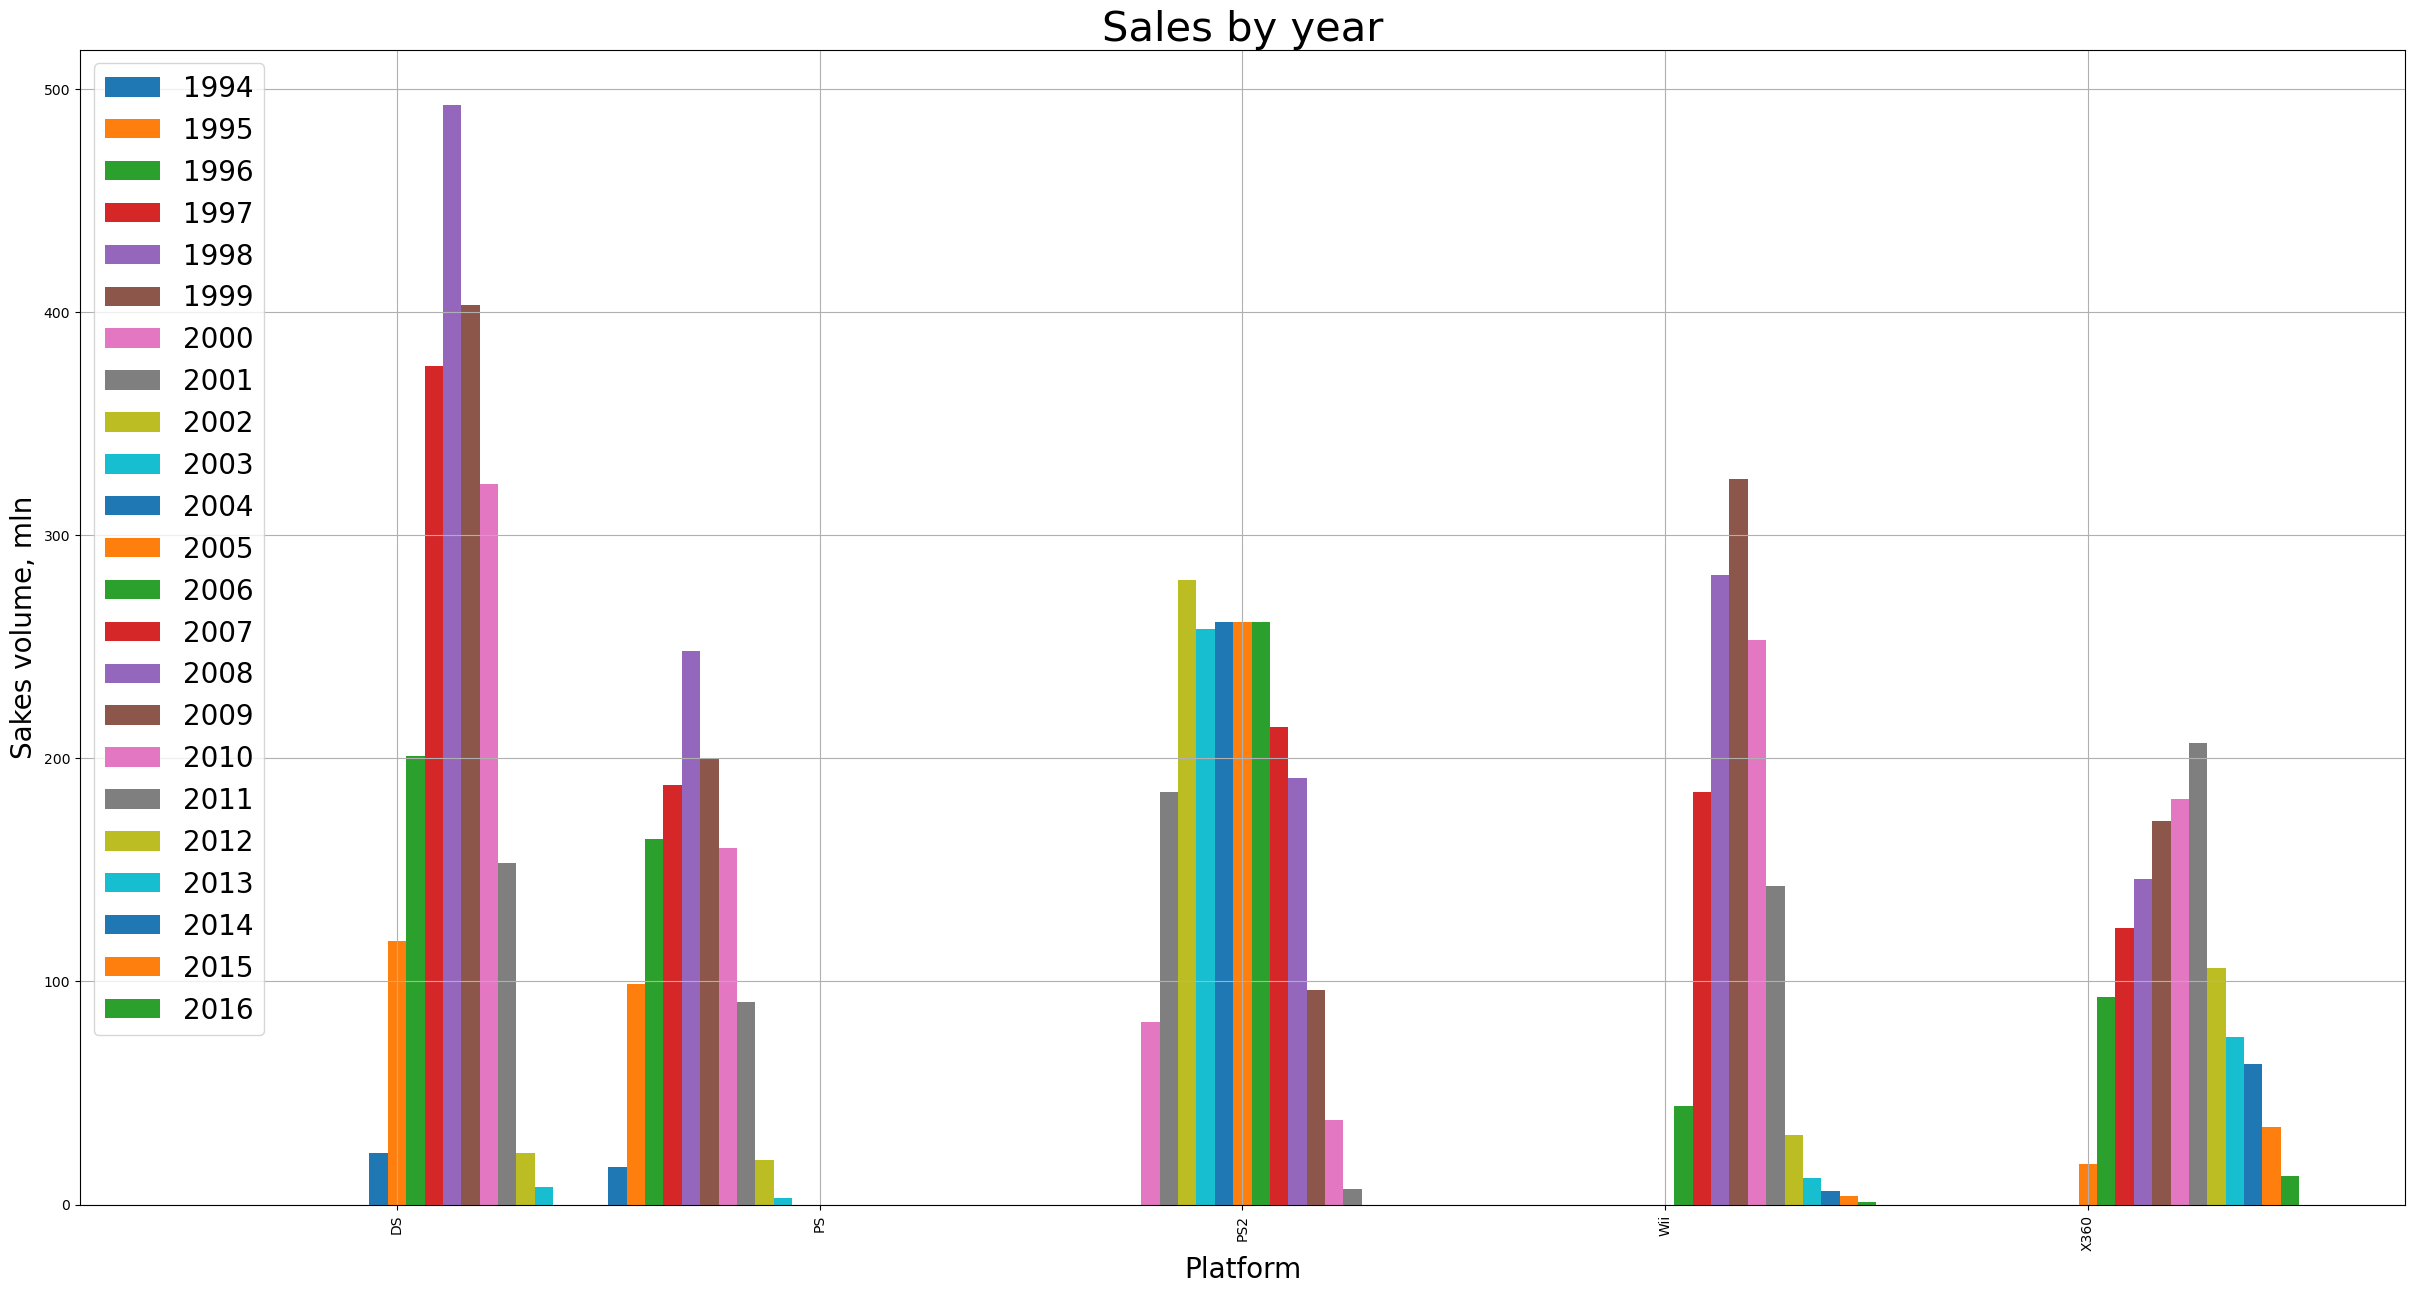

In [47]:
top_sales_platforms.plot(kind='bar', width=1, grid=True, figsize=(30, 15)); 
plt.title('Sales by year', fontsize=30);
plt.xlabel('Platform', fontsize=20);
plt.ylabel('Sakes volume, mln', fontsize=20);
plt.legend(fontsize=20);

We took the top 5 platforms in terms of sales. The chart shows all records, we can see that some platforms (PS2) kept high results for several years in a row. We can also see from the colours that 2008 was important for all the leading platforms. That is, the heyday of game consoles was in and around it.

Let's visualise the sales data for the platforms linearly:

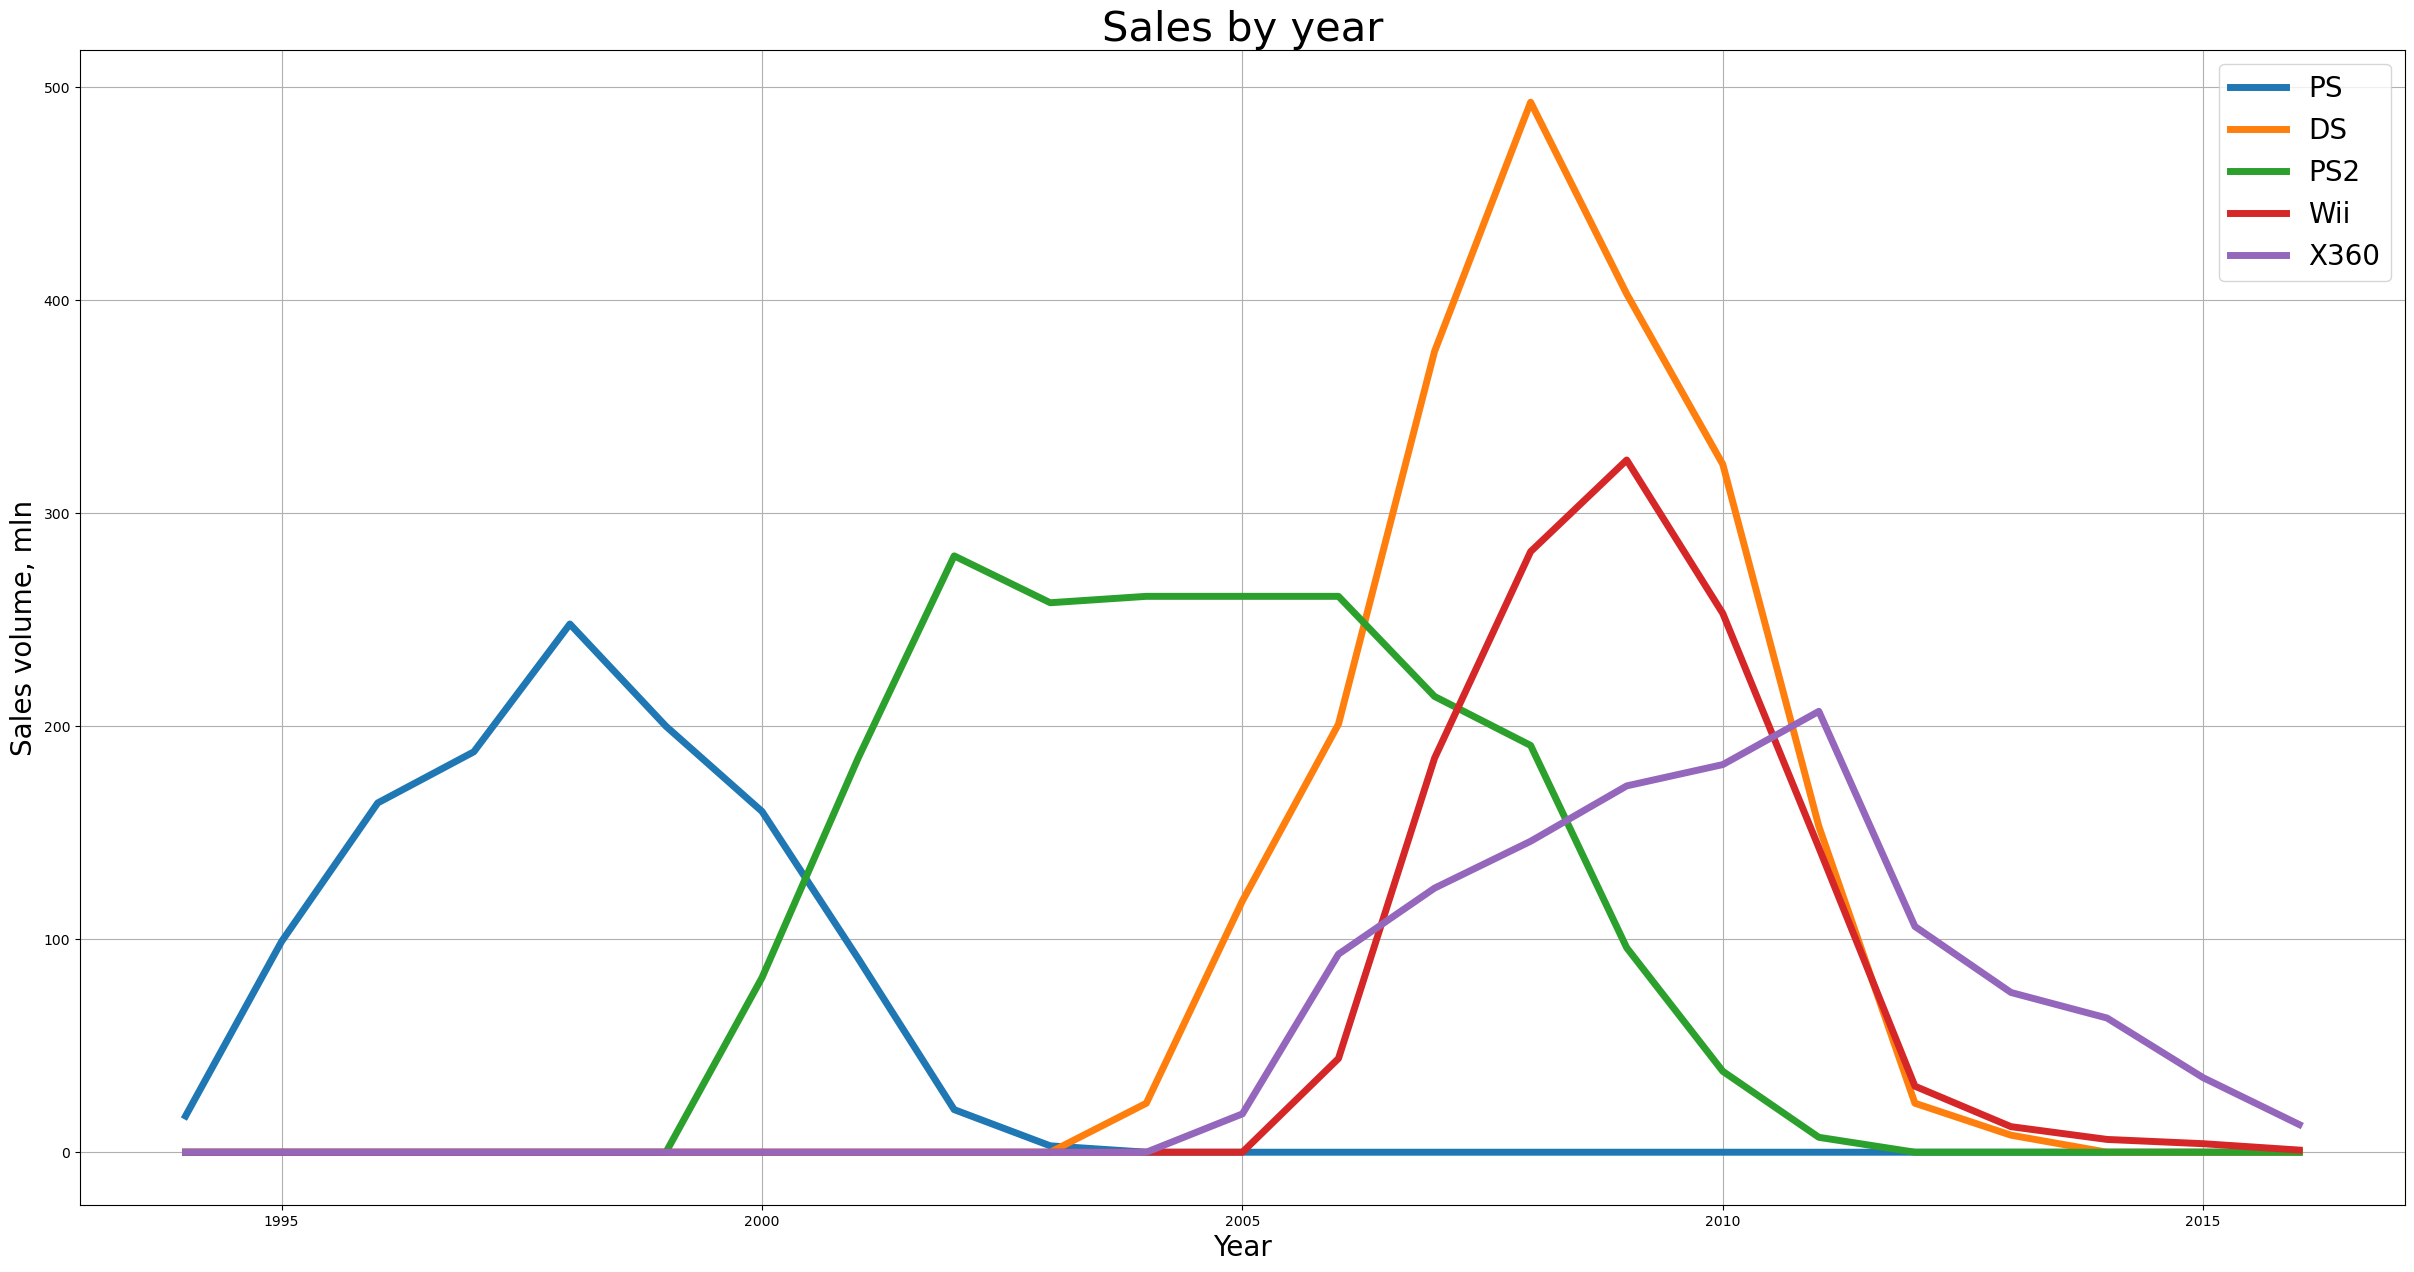

In [48]:
platform_sales_line = games_valuable.pivot_table(index='year_of_release', values='all_regions_sales', columns='platform', aggfunc='count', fill_value=0)

platform_sales_lineplot = platform_sales_line[['PS', 'DS', 'PS2', 'Wii', 'X360']]

platform_sales_lineplot.plot(kind='line', lw=5, grid=True, figsize=(30, 15)); 
plt.title('Sales by year', fontsize=30);
plt.xlabel('Year', fontsize=20);
plt.ylabel('Sales volume, mln', fontsize=20);
#plt.xticklabel(fontsize=15)
plt.legend(fontsize=20);


We can see that the top platforms have stretched in time for 20 years. If in the beginning there were single cases of success, then around 2005 the simultaneous growth of 3 top platforms started with different success. Also on this graph we can notice that PS2 was at the peak longer than the others.

### Based on the data we will choose the actual period to analyse:
It should be a relevant economic period, i.e. recent and also in terms of length able to show if the platform is promising. We have realised that 3-4 years makes this clear. Let's take 5 years - 2012-2016. Let's analyse the state of platforms, direction of movement, sales volumes, etc.

### The state of platforms in 2012-2016:

In [49]:
actual_games_year = games.query('year_of_release > 2011')
actual_games_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16449,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16453,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16456,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16458,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


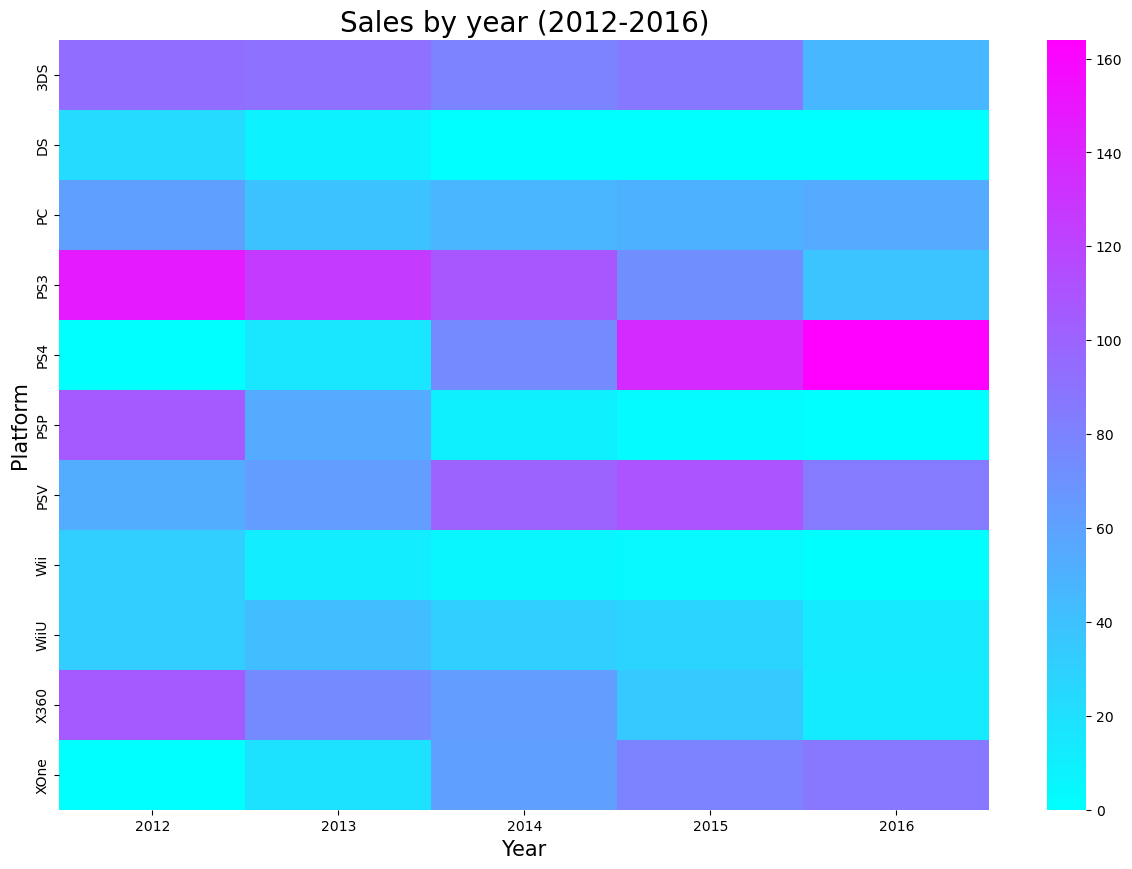

In [50]:
actual_games_platform_heatmap = actual_games_year.pivot_table(index='platform', values='all_regions_sales', columns='year_of_release', aggfunc='count', fill_value=0)
pd.set_option('display.max_columns', None)

plt.figure(figsize=(15, 10))
sns.heatmap(actual_games_platform_heatmap, cmap='cool')

plt.title('Sales by year (2012-2016)', fontsize=20);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Platform', fontsize=15);
plt.show()

With the help of heatmap we can estimate the state of the actual platforms in the specified period:

- 3DS's gradual decline in sales,
- the perpetual fluctuation of the PC,
- the apparent decline of the PS3,
- the rise of the PS4,
- the fluctuations of the PSV,
- the WiiU's gradual decline,
- the sharp decline of the X360,
- the rise of the XOne,
- the decline of the DS, PSP and Wii.  

Let's keep in mind that the data for 2016 is incomplete, due to the fact that the year isn't over yet. Let's highlight the prospects of PS4, XOne and the fluctuations of PC and PSV, which should not be overlooked.

In [51]:
actual_games_platform = actual_games_year.query('platform in ["PS4", "XOne", "PC", "PSV"]')
actual_games_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


### Let's make a sales box plot for the actual platforms:

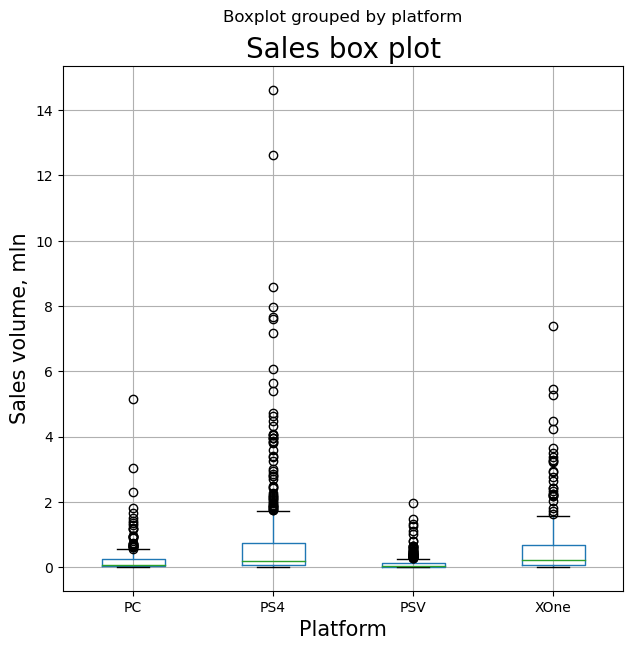

In [52]:
actual_games_platform.boxplot(column='all_regions_sales', by='platform', figsize=(7, 7))
plt.title('Sales box plot', fontsize=20);
plt.xlabel('Platform', fontsize=15);
plt.ylabel('Sales volume, mln', fontsize=15);
plt.show();

For more valid conclusions, let's take a closer look at the boxes themselves and its quantiles.

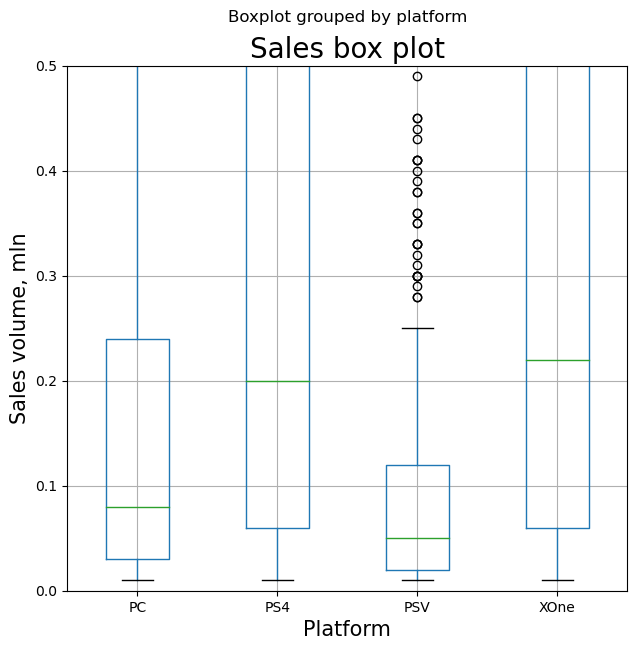

In [53]:
actual_games_platform.boxplot(column='all_regions_sales', by='platform', figsize=(7, 7))
plt.title('Sales box plot', fontsize=20);
plt.xlabel('Platform', fontsize=15);
plt.ylabel('Sales volume, mln', fontsize=15);
plt.ylim(0, 0.5)
plt.show();

We can clearly see the sales leader, the PS4, which has the widest range of sales over the years, its popularity increasing quite sharply from the 2nd year after its release.
The PSV has the narrowest range, but note that the PC was created much earlier.

Median game sales for all platforms are in the range of about 0.05-0.22 million copies, but they all have outliers, so all platforms had super successful games.

In [54]:
actual_games_platform.pivot_table(index='platform', values='all_regions_sales', aggfunc=['min', 'max', 'mean', 'median']).sort_values(('median', 'all_regions_sales'), ascending=False)


,min,max,mean,median
,all_regions_sales,all_regions_sales,all_regions_sales,all_regions_sales
platform,,,,
XOne,0.01,7.39,0.645020,0.22
PS4,0.01,14.63,0.801378,0.20
PC,0.01,5.14,0.250996,0.08
PSV,0.01,1.96,0.119659,0.05


After another visualisation we see our leader, the PS4 with the biggest sales spread and volume. Desktops lose out on the metrics we are interested in.
Median sales for all platforms do not exceed 0.22 million, and the average ranges from 0.12 to 0.8. It is clear from the outliers and the average that games were created for platforms that achieved great successes, the PS4 has the most, with XOne in second place. As for PC and PSV, they have a more stable life, different games have been purchased in decent quantity.

### Reviews on sales impact:

Let's look at the dependency using the example of the games for PS4 with maximum sales in our list:

In [55]:
PS4_game = actual_games_platform.query('platform == "PS4"')

#### Let's look at the Pearson correlation coefficient and visualise the relationship between critics' scores and sales in all regions:

Correlation between critics scores and sales: 0.41


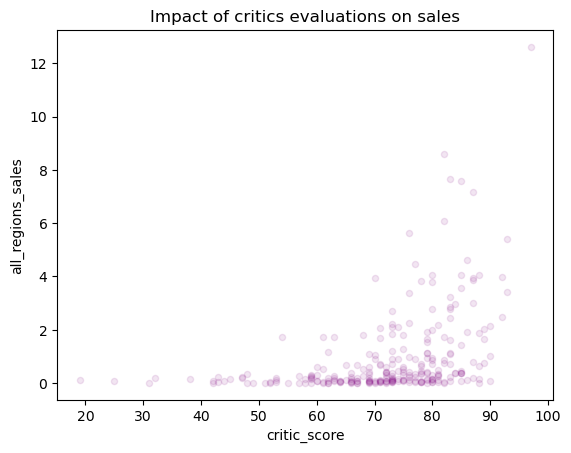

In [56]:
print('Correlation between critics scores and sales:', round(PS4_game['critic_score'].corr(actual_games_year['all_regions_sales']), 2))
PS4_game.plot(x='critic_score', y='all_regions_sales', title='Impact of critics evaluations on sales', kind='scatter', color='purple', alpha=0.1);

We see the expected moderate correlation: the higher the critics' score, the higher the sales. The dots are very diverse, which means that there are games that had both a strong (deep purple) and weak ( delicate purple) correlation.

#### Let's look at the Pearson coefficient and visualise the relationship between user ratings and sales in all regions:¶

Correlation between user ratings and sales: -0.03


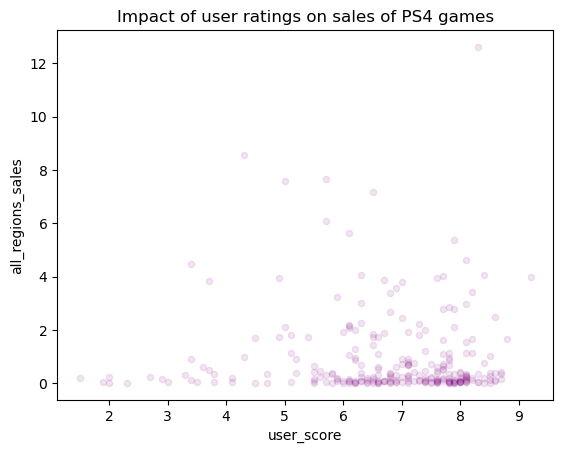

In [57]:
print('Correlation between user ratings and sales:', round(PS4_game['user_score'].corr(actual_games_year['all_regions_sales']), 2))
PS4_game.plot(x='user_score', y='all_regions_sales', title='Impact of user ratings on sales of PS4 games', kind='scatter', color='purple', alpha=0.1);


The correlation between these indicators is different, very weak and inverse (negative). The higher the user rating, the lower the sales. Not in all cases, of course, but in most cases.

Based on testing the impact of reviews on the sales of the best-selling platform, it is safe to say that it is indicative for all. Let's check:

Correlation between critic scores and sales: 0.31


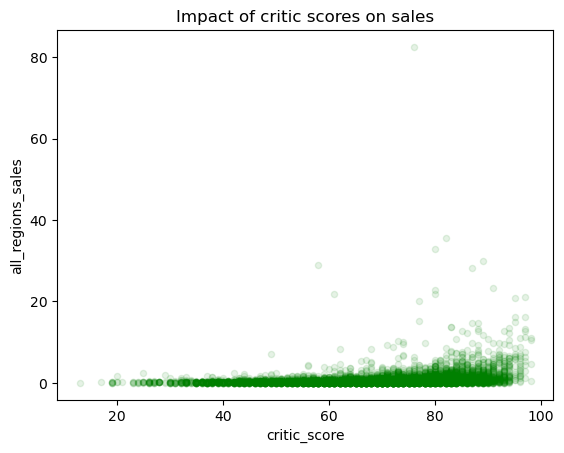

In [58]:
print('Correlation between critic scores and sales:', round(games['critic_score'].corr(actual_games_year['all_regions_sales']), 2))
games.plot(x='critic_score', y='all_regions_sales', title='Impact of critic scores on sales', kind='scatter', color='green', alpha=0.1);

Correlation between user ratings and sales: 0.0


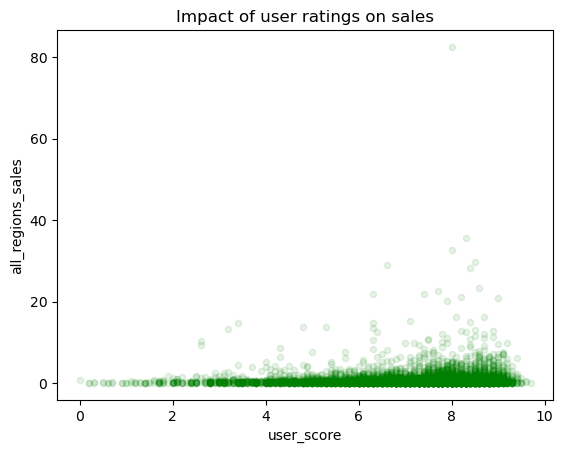

In [59]:
print('Correlation between user ratings and sales:', round(games['user_score'].corr(actual_games_year['all_regions_sales']), 2))
games.plot(x='user_score', y='all_regions_sales', title='Impact of user ratings on sales', kind='scatter', color='green', alpha=0.1);

We see a similar dependence on all platforms. There is no clarity, because not everyone and not all games are evaluated and reviewed, that's how it works. It is also known that there are games that are released only on a certain platform. 

In [60]:
actual_games_year.sort_values('critic_score', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
1714,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


Let's take into consideration the top 5 critically acclaimed action games for a variety of platforms.

Let's look at the same metrics for XOne:

In [61]:
xbox_one_game = actual_games_platform.query('platform == "XOne"')

Correlation between critic scores and sales: 0.42


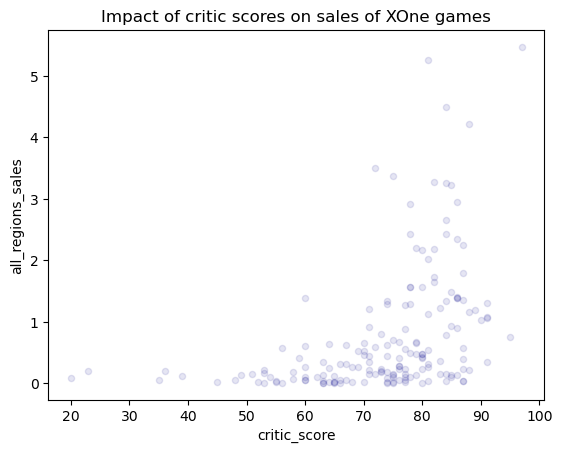

In [62]:
print('Correlation between critic scores and sales:', round(xbox_one_game['critic_score'].corr(actual_games_year['all_regions_sales']), 2))
xbox_one_game.plot(x='critic_score', y='all_regions_sales', title='Impact of critic scores on sales of XOne games', kind='scatter', color='darkblue', alpha=0.1);

Correlation between user ratings and sales: -0.07


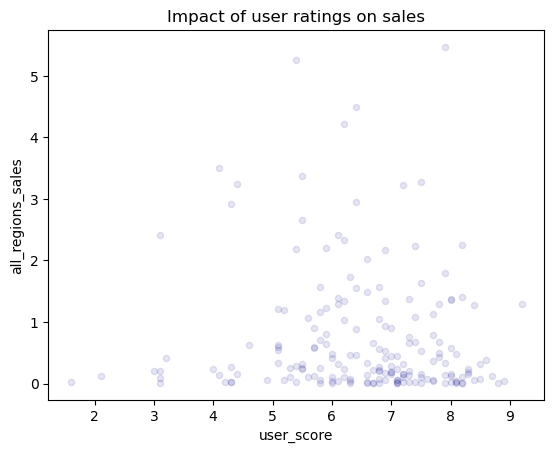

In [63]:
print('Correlation between user ratings and sales:', round(xbox_one_game['user_score'].corr(actual_games_year['all_regions_sales']), 2))
xbox_one_game.plot(x='user_score', y='all_regions_sales', title='Impact of user ratings on sales', kind='scatter', color='darkblue', alpha=0.1);

Let's see everything about PC:

In [64]:
pc_game = actual_games_platform.query('platform == "PC"')

Correlation between critic scores and sales: 0.24


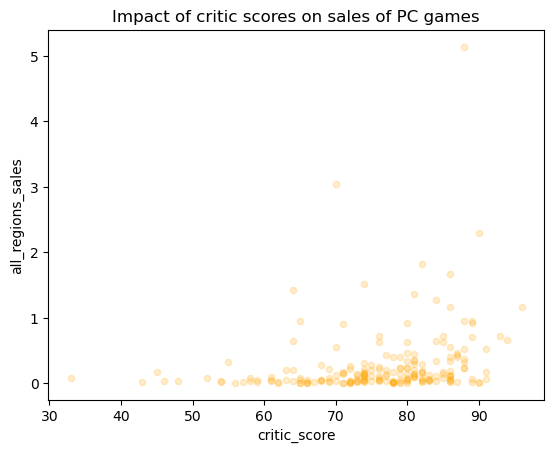

In [65]:
print('Correlation between critic scores and sales:', round(pc_game['critic_score'].corr(actual_games_year['all_regions_sales']), 2))
pc_game.plot(x='critic_score', y='all_regions_sales', title='Impact of critic scores on sales of PC games', kind='scatter', color='orange', alpha=0.2);

Correlation between user ratings and sales: -0.12


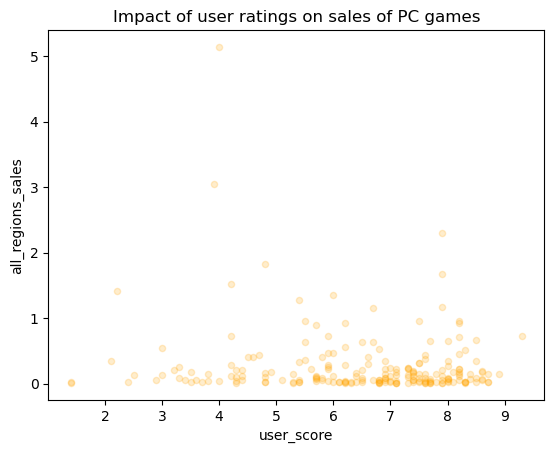

In [66]:
print('Correlation between user ratings and sales:', round(pc_game['user_score'].corr(actual_games_year['all_regions_sales']), 2))
pc_game.plot(x='user_score', y='all_regions_sales', title='Impact of user ratings on sales of PC games', kind='scatter', color='orange', alpha=0.2);

And also PVC:

In [67]:
psv_game = actual_games_platform.query('platform == "PSV"')

Correlation between critic scores and sales: 0.09


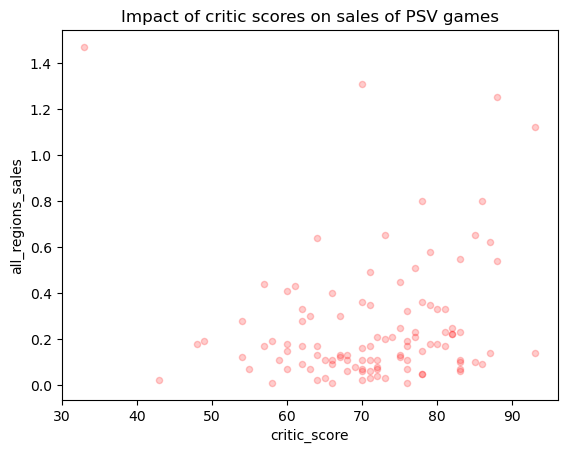

In [68]:
print('Correlation between critic scores and sales:', round(psv_game['critic_score'].corr(actual_games_year['all_regions_sales']), 2))
psv_game.plot(x='critic_score', y='all_regions_sales', title='Impact of critic scores on sales of PSV games', kind='scatter', color='red', alpha=0.2);

Correlation between user ratings and sales: -0.0


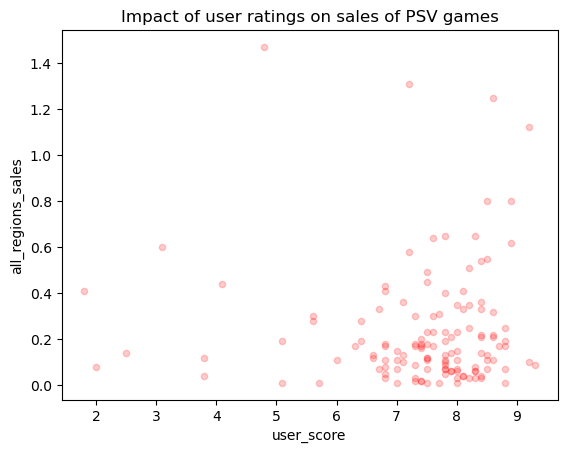

In [69]:
print('Correlation between user ratings and sales:', round(psv_game['user_score'].corr(actual_games_year['all_regions_sales']), 2))
psv_game.plot(x='user_score', y='all_regions_sales', title='Impact of user ratings on sales of PSV games', kind='scatter', color='red', alpha=0.2);

**Summary:**  
We can see some similarity in the correlation between critics' and users' evaluations and sales. However, PSV has the most different correlation, its sales are low, barely over 100 thousand copies. This is also an indicator, it is also interesting to watch the outsiders.

### Distribution of profits from games by genre

In [70]:
genre = actual_games_year.pivot_table(index='genre', values='all_regions_sales', columns='year_of_release', aggfunc='sum', fill_value=0)
print(genre)

year_of_release    2012    2013   2014   2015   2016
genre                                               
Action           119.25  122.86  97.23  72.02  30.11
Adventure          5.79    6.09   5.57   8.16   3.82
Fighting           9.18    7.09  15.85   7.90   4.47
Misc              22.22   25.27  23.38  11.57   2.60
Platform          18.37   24.54   8.81   6.05   3.23
Puzzle             1.72    0.96   1.49   0.71   0.01
Racing            13.61   12.37  16.66   8.07   2.79
Role-Playing      46.91   44.45  45.62  37.64  18.18
Shooter           71.75   62.04  65.21  67.51  38.22
Simulation        13.36    8.63   5.58   5.66   1.89
Sports            30.41   41.17  45.15  40.84  23.49
Strategy           3.26    6.12   0.98   1.85   1.13


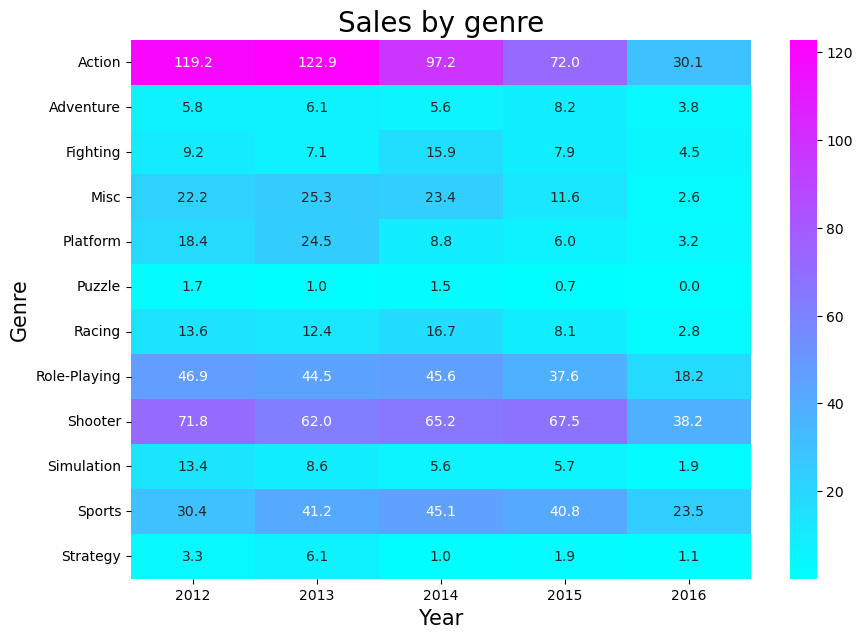

In [71]:
plt.figure(figsize=(10, 7))
sns.heatmap(genre, cmap='cool', annot=True, fmt=".1f")

plt.title('Sales by genre', fontsize=20);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Genre', fontsize=15);
plt.show()

The chart clearly shows the leaders among the genres: action, shooters, and slightly behind sports and role-playing games. Their sales volumes, depending on the year, reach 40-60 million copies. The rest have indicators below that.
We can also note a genre with minimal sales: puzzle, we will also take it for research.

Let's see a linear graph by year:

In [72]:
actual_genres = actual_games_year.query('genre in ["Action", "Shooter", "Sports", "Role-Playing", "Puzzle"]')
actual_genres.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


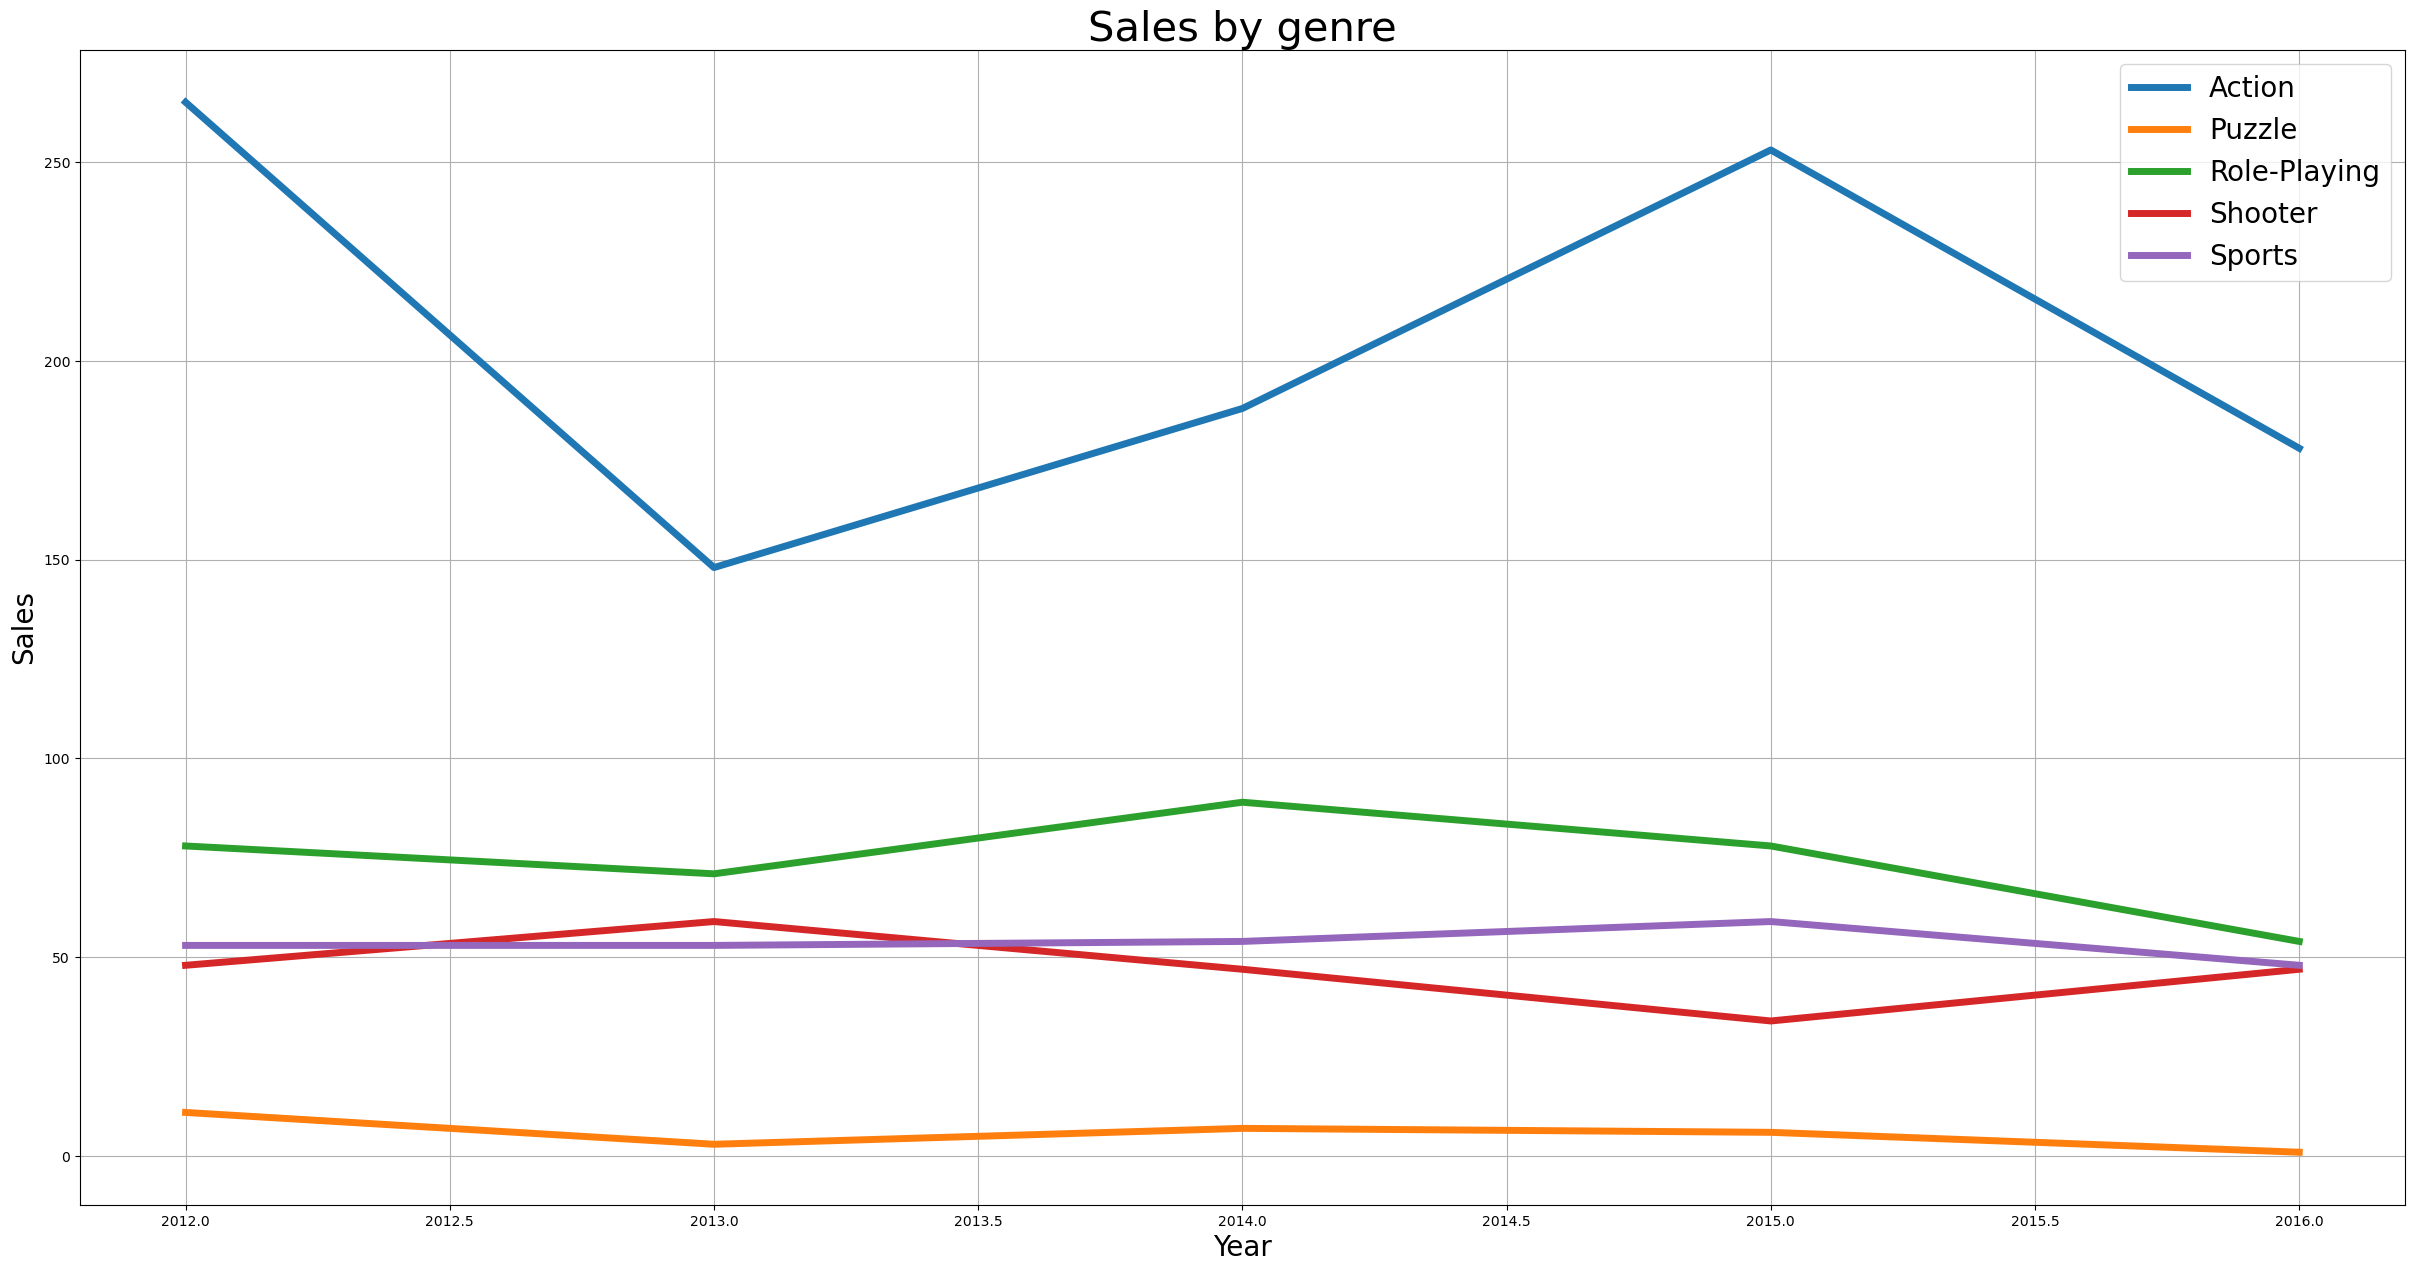

In [73]:
genre_line = actual_genres.pivot_table(index='year_of_release', values='all_regions_sales', columns='genre', aggfunc='count', fill_value=0)

genre_line.plot(kind='line', lw=5, grid=True, figsize=(30, 15)); 
plt.title('Sales by genre', fontsize=30);
plt.xlabel('Year', fontsize=20);
plt.ylabel('Sales', fontsize=20);
plt.legend(fontsize=20);


Throughout the entire period analysed, the action genre holds above all other genres, with the three genres following it next to each other, gaining and losing in sales. The puzzle genre fluctuates around 0.

Let's also see a box plot distribution to check the most profitable genre. High overall sales figures can hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It's better to find a genre where games consistently generate high revenue - for that, it's worth looking at average or median sales.

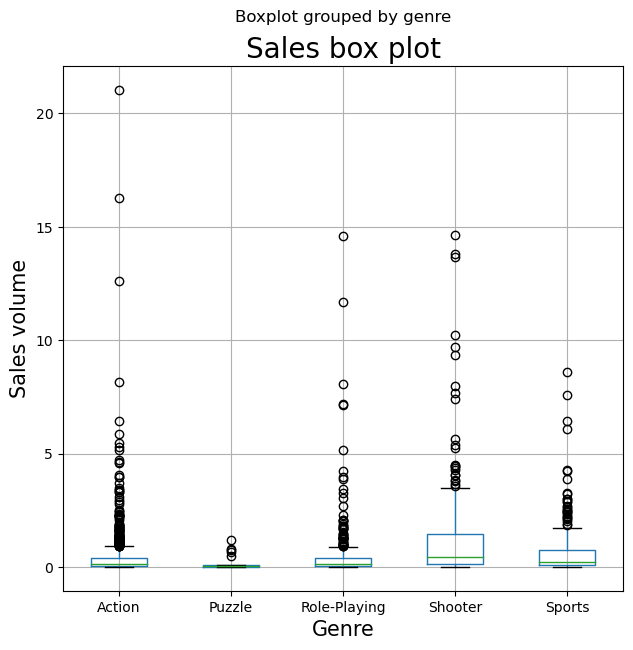

In [74]:
actual_genres.boxplot(column='all_regions_sales', by='genre', figsize=(7, 7))
plt.title('Sales box plot', fontsize=20);
plt.xlabel('Genre', fontsize=15);
plt.ylabel('Sales volume', fontsize=15);
plt.show();

Let's take a closer look at the boxes themselves:

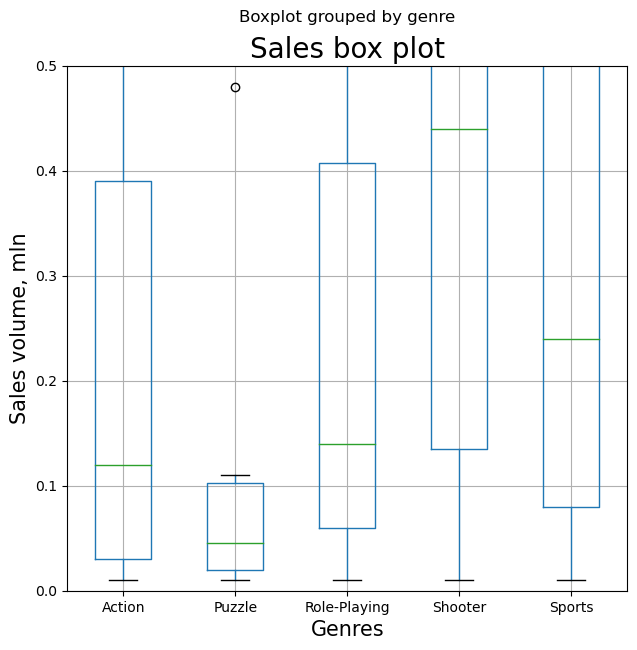

In [75]:
actual_genres.boxplot(column='all_regions_sales', by='genre', figsize=(7, 7))
plt.title('Sales box plot', fontsize=20);
plt.xlabel('Genres', fontsize=15);
plt.ylabel('Sales volume, mln', fontsize=15);
plt.ylim(0, 0.5)
plt.show();

In [76]:
actual_games_genres = actual_games_year.pivot_table(index='genre', values='all_regions_sales', aggfunc=['sum', 'mean', 'median'])

actual_genres = actual_games_genres.query('genre in ["Action", "Shooter", "Sports", "Role-Playing", "Puzzle"]')
actual_genres

,sum,mean,median
,all_regions_sales,all_regions_sales,all_regions_sales
genre,,,
Action,441.47,0.427781,0.120
Puzzle,4.89,0.174643,0.045
Role-Playing,192.80,0.521081,0.140
Shooter,304.73,1.296723,0.440
Sports,181.06,0.678127,0.240


Having analysed the data, we can see that action figures are the leaders in terms of sales and success, looking at outliers. However, by median we can see that they are far from the first.   
Shooters lead in median sales and second in total sales.  
It's very interesting to look at role-playing games: they're in third place in terms of total sales, but lead in terms of median sales, meaning that 
on average games of this genre are quite successful, however median sales are low, meaning that a smaller proportion of them achieve sales success.
Sports games are leaders in median sales, which means that most of them are doing well in sales.
Our outsider, the Puzzle genre, shows what is bad by all parameters.

### General summary:  
In this exploratory analysis we have studied the history of the games market by year in North America, Europe and Japan, identified the industry leaders by numbers and visually, analysed the sales dynamics, the impact of critic and user reviews on the sales of industry leaders, and determined which genres of games are most popular.
We identified the average duration of a platform's existence of 6-10 years, assuming success in 3-4 years.
We identified the leaders among the platforms in terms of video game sales: PS4, XOne, PC, PSV. We identified popular genres of games: action, shooters, sports and role-playing games. We identified the outsider - puzzle games.

## User portrait of each region

### Let's find the most popular platforms (top 5) by region, looking at the differences in sales shares:

          na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31


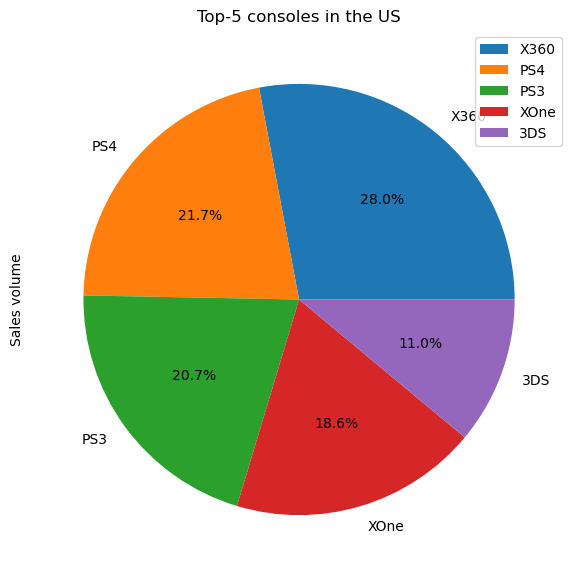

In [77]:
popular_platforms_na = actual_games_year.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
print(popular_platforms_na.head(5))

popular_platforms_na.head(5).plot(y='na_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 consoles in the US',
ylabel = 'Sales volume');

          eu_sales
platform          
PS4         141.09
PS3         106.85
X360         74.52
XOne         51.59
3DS          42.64


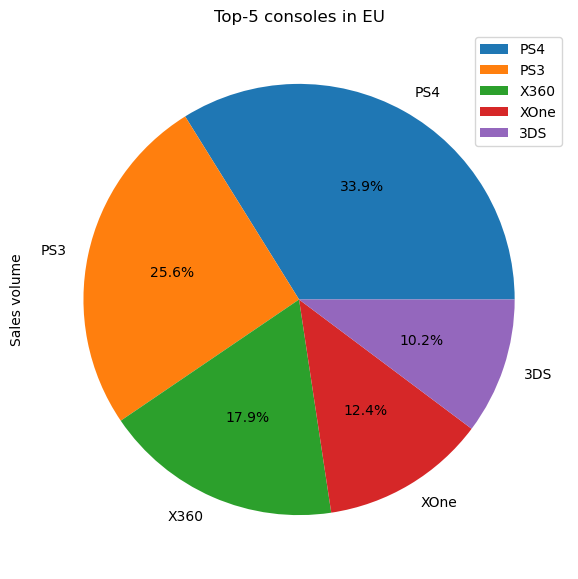

In [78]:
popular_platforms_eu = actual_games_year.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
print(popular_platforms_eu.head(5))

popular_platforms_eu.head(5).plot(y='eu_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 consoles in EU',
ylabel = 'Sales volume');

          jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01


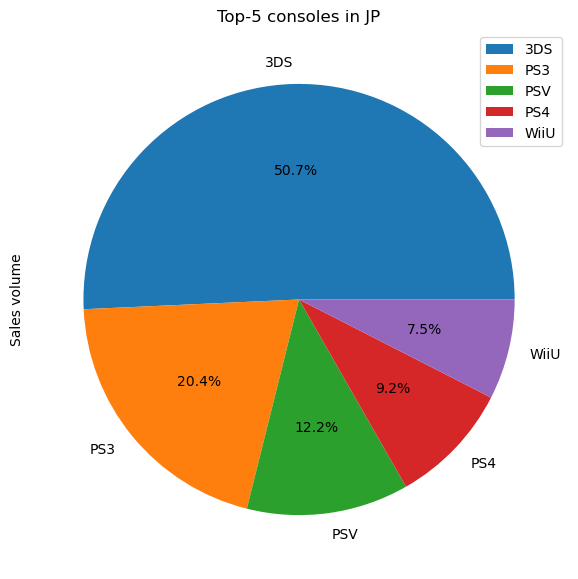

In [79]:
popular_platforms_jp = actual_games_year.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
print(popular_platforms_jp.head(5))

popular_platforms_jp.head(5).plot(y='jp_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 consoles in JP',
ylabel = 'Sales volume');

Got tables and visualisations of the sales shares of the top five consoles in different regions of the world for our relevant period.
PS3 and PS4 are represented everywhere.
PS4 leading sales in Europe and in 2nd place in North America and 4th in Japan.
PS3 in 3rd place in North America and 2nd in Europe and Japan. Wii and X360 are represented in North America and Europe, Japan is distinguished by SNES and 3DS.
In general, we can see that in North America and Europe the volume of console sales is about the same, in Japan it is about half as much. However, we should not forget that the population of North America and Europe are comparable, and Japan has 3 times less. Using PS4 as an example, let's see the difference in sales share: in North America it's 21.7%, in Europe - 33.9%%b in Japan - 12.2%. The shares are very different. The share of the leader is also different: in North America it is 28.0%, and there the shares of leaders are evenly distributed across the market, in Euproe - 33.9%, there are a couple of leaders, the rest are more modest, in Japan - 50.7% of the population plays the same toy.

### The most popular genres

Let's also look at the popularity of genres in different regions, making a top 5.

              na_sales
genre                 
Action          177.90
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19


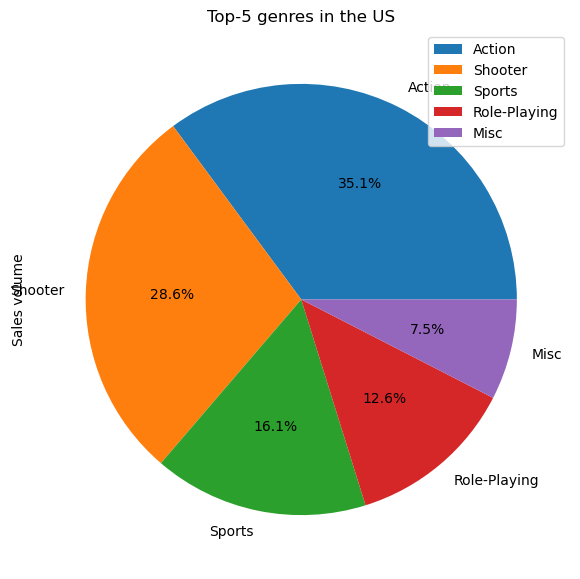

In [80]:
popular_genres_na = actual_games_year.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
print(popular_genres_na.head(5))

popular_genres_na.head(5).plot(y='na_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 genres in the US',
ylabel = 'Sales volume');

              eu_sales
genre                 
Action          159.59
Shooter         113.47
Sports           69.08
Role-Playing     48.53
Racing           27.29


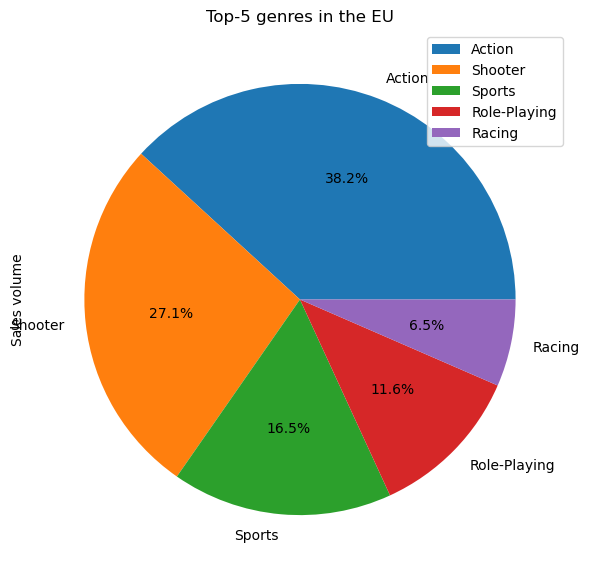

In [81]:
popular_genres_eu = actual_games_year.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
print(popular_genres_eu.head(5))

popular_genres_eu.head(5).plot(y='eu_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 genres in the EU',
ylabel = 'Sales volume');

              jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44


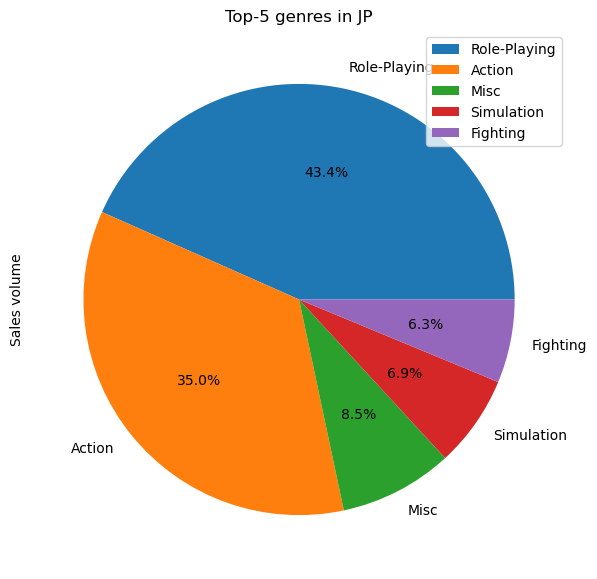

In [82]:
popular_genres_jp = actual_games_year.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
print(popular_genres_jp.head(5))

popular_genres_jp.head(5).plot(y='jp_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 genres in JP',
ylabel = 'Sales volume');

n North America and Europe action and shooters are leading, in Japan action is on the 2nd place, shooters are absent. Also the 3rd and 4th places are the same in North America and Europe - sports and role-playing games. Remembering our conclusions about genres earlier, we can compare that the majority of players are in North America and Europe (we highlighted these genres as the most popular in all regions).
In North America the 5th place is occupied by all sorts of mash-ups without a specific genre, in Europe - racing.
Japan is known for its love for all kinds of role-playing games, in 3rd place - games without genre, in 4th place - simulators, in 5th place - martial arts simulation.
As for market shares, the leaders have about the same volume - 35-40%, the second places - about 30%.

### Impact of ESRB rating on sales

We know that this rating system is created for use in the USA and Canada, so it is not very relevant to use it in other regions. However, just in case, let's check it out:

        na_sales
rating          
All       487.72
M         231.63
E         114.37
E10+       75.70
T          66.02


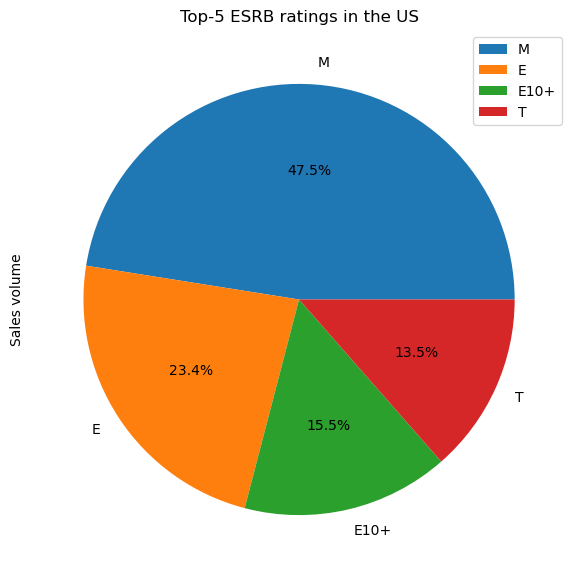

In [83]:
popular_rating_na_all = actual_games_year.pivot_table(index='rating', values='na_sales', aggfunc='sum', margins=True).sort_values(by='na_sales', ascending=False)
print(popular_rating_na_all)

popular_rating_na = actual_games_year.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
popular_rating_na.head(5).plot(y='na_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 ESRB ratings in the US',
ylabel = 'Sales volume');

        eu_sales
rating          
All       415.56
M         194.21
E         113.02
E10+       55.37
T          52.96


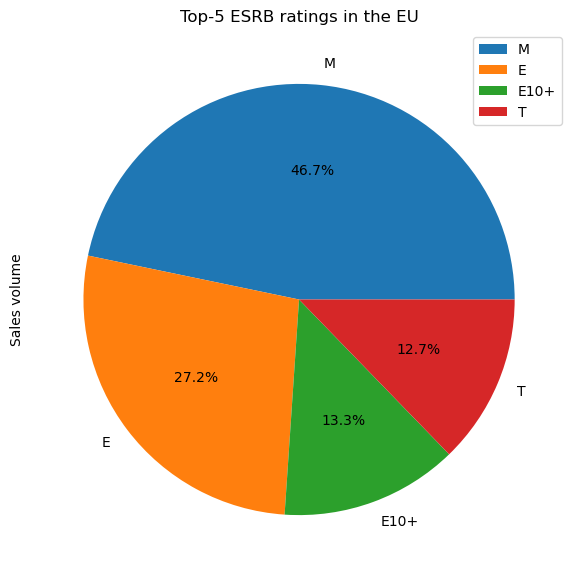

In [84]:
popular_rating_eu_all = actual_games_year.pivot_table(index='rating', values='eu_sales', aggfunc='sum', margins=True).sort_values(by='eu_sales', ascending=False)
print(popular_rating_eu_all.head(5))

popular_rating_eu = actual_games_year.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
popular_rating_eu.head(5).plot(y='eu_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 ESRB ratings in the EU',
ylabel = 'Sales volume');

        jp_sales
rating          
All        83.74
E          28.33
T          26.02
M          21.20
E10+        8.19


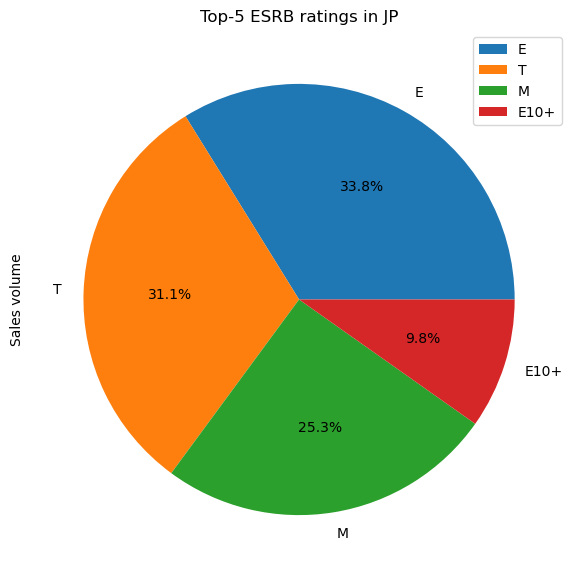

In [85]:
popular_rating_jp_all = actual_games_year.pivot_table(index='rating', values='jp_sales', aggfunc='sum', margins=True).sort_values(by='jp_sales', ascending=False)
print(popular_rating_jp_all.head(5))

popular_rating_jp = actual_games_year.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
popular_rating_jp.head(5).plot(y='jp_sales', kind='pie', figsize=(7, 7), autopct='%1.1f%%',
title = 'Top-5 ESRB ratings in JP',
ylabel = 'Sales volume');

According to the results of the analysis we see that in all regions there are only games of 4 types of rating (M, E, E10+, T).
We can also see that in North America games with rating M (17+) are successful, followed by E (games for everyone), then E10+ (10+), and at the end of the list - T (teenagers, 13-19 years old).
Sales in these categories are also high in Europe, which means that North American games are played in Europe. The order is the same there, the volume is 60+ million less. Japan has a very developed video game market, Asia leads in many rankings, so it is better to consider its market separately. Games with North American classification sold there during the current period are 6 times less than in North America itself.

### Summary:
Having analysed the games market by regions, we have made some important observations described in detail above.
Briefly:
Over the studied 5 years we can see that the tastes of users in North America and Europe are close, with 4 titles (PS4, PS3, X360 and Wii) matching in the console rankings. Japan, North America and Europe are similar only in PS3 and PS4.
Regarding genres, North America and Europe are also similar, with action and shooter genres being favoured by the majority, while in Japan, RPGs lead the way, with action games in second place.
The ESRB ranking proved to be more relevant to North America, Europe a little less so, while sales of North American games are low in Japan. Asia is known to be the leader in game production, and they have their own ratings.

## Hypothesis testing

### Are the average user ratings of Xbox One and PC platforms the same?

Let's set the **null hypothesis** as "Average ratings of Xbox One and PC are equal", the **alternative hypothesis** is "Average ratings are not equal".

Making samples:

In [86]:
xbox_one_selection = actual_games_year.query('platform == "XOne" & user_score.notna()')['user_score']
xbox_one_selection.describe()


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [87]:
pc_selection = actual_games_year.query('platform == "PC" & user_score.notna()')['user_score']
pc_selection.describe()


count    207.000000
mean       6.438647
std        1.666650
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Testing hypothesis itself:

In [88]:
alpha = 0.05
results = st.ttest_ind(xbox_one_selection, pc_selection, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.29851056257581865
Нет оснований отвергнуть нулевую гипотезу


In [89]:
actual_games_year.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,user_score,user_score,user_score
platform,,,
PC,207,6.438647,6.8
XOne,182,6.521429,6.8


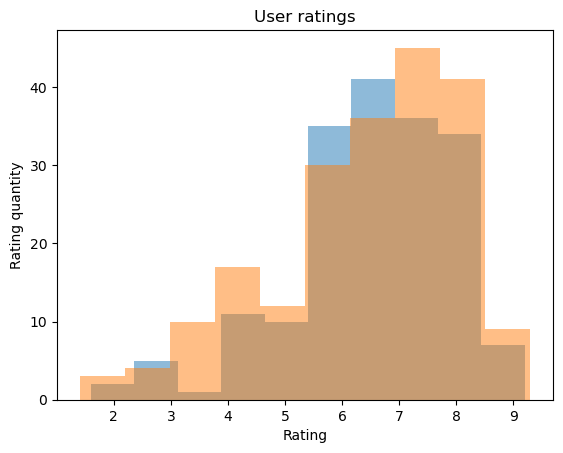

In [90]:
fig, pic = plt.subplots()
pic.hist(xbox_one_selection, bins=10, alpha=0.5)
pic.hist(pc_selection, bins=10, alpha=0.5)
plt.title('User ratings')
plt.xlabel('Rating')
plt.ylabel('Rating quantity')
plt.show()

Although the p-value is small even at a statistical significance level of 5%, we can see the average user ratings of Xbox One and PC platforms are very close. So we can say that they are equal within the margin of error.

### Are the average user ratings of Action and Sports genres different?

Let's set the **null hypothesis** as "The average ratings of Action and Sports genres are equal", the **alternative hypothesis** as "The average ratings of the genres are not equal".

Making samples:

In [91]:
action_selection = actual_games_year[(actual_games_year.genre == 'Action') & (actual_games_year.user_score.notna())]['user_score']
action_selection.describe()

count    524.000000
mean       6.828244
std        1.375073
min        1.600000
25%        6.275000
50%        7.150000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [92]:
sports_selection = actual_games_year[(actual_games_year.genre == 'Sports') & (actual_games_year.user_score.notna())]['user_score']
sports_selection.describe()

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Testing the hypothesis:

In [93]:
alpha = 0.01
results = st.ttest_ind(action_selection, sports_selection)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 3.719002625423399e-26
Отвергаем нулевую гипотезу


In [94]:
actual_games_year.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,user_score,user_score,user_score
genre,,,
Action,524,6.828244,7.15
Sports,194,5.455670,5.75


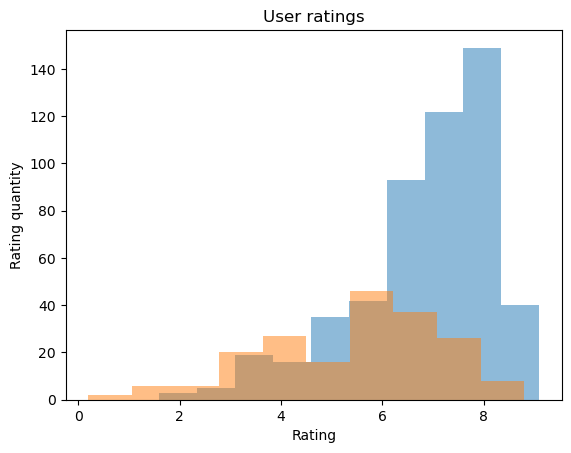

In [95]:
fig, pic = plt.subplots()
pic.hist(action_selection, bins=10, alpha=0.5)
pic.hist(sports_selection, bins=10, alpha=0.5)
plt.title('User ratings')
plt.xlabel('Rating')
plt.ylabel('Rating quantity')
plt.show()

Since the p-value is very small even at α = 0.01, and the graph shows a small overlap, equality of samples can be rejected.

### Threshold value of α

Usually, a statistical significance level of α = 0.05 is sufficient for research, but sometimes it can be determined to be 0.01 or 0.001 for more accurate conclusions.

### Criteria for testing the hypotheses?

We have two independent samples and the need to test their equality. For this purpose, ttest_ind is selected.

## General summary
We studied historical open source data on game sales, user and expert ratings, genres and platforms.
Based on the available data, we can guess which games will be selling well in 2017:  

For platforms: PS4, PS3, XOne, PSV for all markets, and 3DS for the Asian market.  
  
By genre: action, shooters, sports for all markets, and role-playing for Japan. For NA and EU market the important factor will be ESRB rating: M, E - for all markets, E, T - for Japan (but remember that the Japanese video game market is big, there is a different rating system).  
  
We also determined that critics' ratings play an important role for sales: the top 5 games according to critics' ratings are action games for a variety of platforms, which we have already realised as a result of other analyses.